# Machine Learning Engineer Nanodegree
## Capstone project
Kyle McMillan

This notebook is used to mark points on a map using the basemap module.
<br>It will print points on a map focused on New Zealand.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap
from IPython.display import display

In [5]:
data_file = '~/Documents/Udacity/My Projects/capstone/earthquakes_20170113.csv'
df = pd.read_csv(data_file, dtype={"publicid": str})

# Drop values less than 1800s due to datetime limitations
df=df.drop(df.index[586892: ])

#df = df[pd.notnull(df["eventtype"])] """Most likely are earthquakes

#Remove event type rows with these values - not related to tectonic earthquakes
df = df[df.eventtype != "snow avalanche"]
df = df[df.eventtype != "outside of network interest"]
df = df[df.eventtype != "landslide"]
df = df[df.eventtype != "sonic boom"]
df = df[df.eventtype != "debris avalanche"]
df = df[df.eventtype != "not locatable"]
df = df[df.eventtype != "quarry blast"]
df = df[df.eventtype != "explosion"]
df = df[df.eventtype != "duplicate"]
df = df[df.eventtype != "volcanic eruption"]
df = df[df.eventtype != "nuclear explosion"]
df = df[df.eventtype != "induced earthquake"]
df = df[df.eventtype != "other"]

df = df.drop(df.columns[[0,1,3,8,9,10,11,12,13,14,15,16,17,18,19,20]], axis=1)

#Remove these magnitudes values - data was not measured accurately
df = df[df.magnitude >= 0]

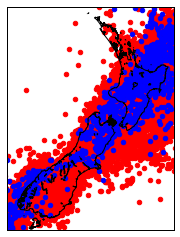

In [6]:
#map focused on NZ

m = Basemap(projection='merc', lat_0 = -41, lon_0 = 175,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=165.58, llcrnrlat=-47.33,
    urcrnrlon=179, urcrnrlat=-33.72)
 
#map.fillcontinents(color = 'coral')

lons = df.longitude[df.magnitude < 5] #All earthquakes less that 5 magnitude
lats = df.latitude[df.magnitude < 5]


lons1 = df.longitude[df.magnitude >= 5] #All earthquakes 5 and over magnitude
lats1 = df.latitude[df.magnitude >= 5]


m.drawcoastlines()
x, y = m(lons.values,lats.values)  # .values as needs to be in an array
m.scatter(x,y,20,color='red')  # Number is point size
x1, y1 =m(lons1.values, lats1.values)
m.scatter(x1,y1,20,color='blue')

 
plt.show()

In [14]:
data_file = '~/Documents/Udacity/My Projects/capstone/test_earthquake.csv'
df_1 = pd.read_csv(data_file, dtype={"publicid": str})

#df = df.drop(df.columns[[0,1,3,8,9,10,11,12,13,14,15,16,17,18,19,20]], axis=1)

#Remove these magnitudes values - data was not measured accurately
#df = df[df.magnitude >= 0]

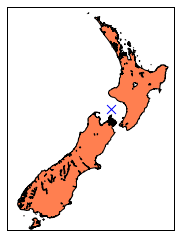

In [32]:
m = Basemap(projection='merc', lat_0 = -41, lon_0 = 175,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=165.58, llcrnrlat=-47.33,
    urcrnrlon=179, urcrnrlat=-33.72)
 

lons = df_1[[4]] 
lats = df_1[[5]]

m.drawcoastlines()
x1, y1 =m(lons.values, lats.values)
m.scatter(x1,y1,80,color='blue', marker='x')
m.fillcontinents(color='coral')
 
plt.show()